# Pandas Series

Pandas provides a `Series` object that is very similar to a numpy array, but with some additional functionality. In this lesson, we will learn about pandas Series and how to work with them.

In [1]:
import pandas as pd

Convention is to import the `pandas` module with the alias `pd`.

## Creating Series

Series can be created from a list or a numpy array:

In [2]:
series = pd.Series([100, 43, 26, 17])
type(series)

pandas.core.series.Series

In [3]:
series

0    100
1     43
2     26
3     17
dtype: int64

## Series Properties

A series contains several additional pieces of meta-information that a list does not:

- an *index*, a way to reference items in the series. This is the numbers 0-3 in our example above

- a *dtype*, the data type of the elements in the series, this is `int64` in our example above, and the dtype was inferred from the data we used.

    Pandas has several main datatypes we will work with:

    - int: integer, whole number values
    - float: decimal numbers
    - bool: true or false values
    - object: strings
    - category: a fixed set of string values

- a *name*, an optional human-friendly name for the series

Our series doesn't have a name, but we can give it one:

In [4]:
series.name = 'My Numbers'
series

0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64

In [5]:
series.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
series.dtype

dtype('int64')

Notice what happens when we create a series of other data types:

In [7]:
pd.Series([3, 2, 4.5])

0    3.0
1    2.0
2    4.5
dtype: float64

In [8]:
pd.Series(['a', 'b', 'c'])

0    a
1    b
2    c
dtype: object

We can convert between data types with the `.astype` method.

In [9]:
string_series = pd.Series([3, .5, 4.5, 6]).astype('str')
string_series

0    3.0
1    0.5
2    4.5
3    6.0
dtype: object

In [10]:
string_series.astype('float')

0    3.0
1    0.5
2    4.5
3    6.0
dtype: float64

## Vectorized Operations

Like numpy arrays, pandas series are vectorized by default, for example, we can easily use the basic arithmatic operators to manipulate every element in the series.

In [11]:
series + 1

0    101
1     44
2     27
3     18
Name: My Numbers, dtype: int64

In [12]:
series / 2

0    50.0
1    21.5
2    13.0
3     8.5
Name: My Numbers, dtype: float64

Comparison operators also work:

In [13]:
series == 17

0    False
1    False
2    False
3     True
Name: My Numbers, dtype: bool

In [14]:
series > 40

0     True
1     True
2    False
3    False
Name: My Numbers, dtype: bool

## Series Methods

Series have a number of useful methods that we can use for various sorts of manipulations and transformations.

We will first look at `.any`, to check if any value in the series is true, and `.all`, to check if every value in the series is true. Both will return a boolean value whether or not the condition is met.

For example, we could check to see if there are any negative values in the series like this:

In [15]:
(series < 0).any()

False

We could check if all the numbers are positive like this:

In [16]:
(series > 0).all()

True

### `.head` and `.tail`

`.head` and `.tail` can be used to look at the first or last several values in a series:

In [17]:
series.head()

0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64

In [18]:
series.tail(2)

2    26
3    17
Name: My Numbers, dtype: int64

### Value Counts

`.value_counts` is another handy method that will quickly give us a count of the unique values in a series:

In [19]:
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts()

a    4
b    2
d    1
c    1
dtype: int64

### Check if each value is in a set of values

The `.isin` method can be used to tell whether or not each value in the series is in a set of known values. For example, if we have a series of letters, we could use `.isin` to tell whether each letter is a vowel:

In [20]:
vowels = list('aeiou')
letters = list('abcdefghijk')
letters_series = pd.Series(letters)
letters_series

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
dtype: object

In [21]:
letters_series.isin(vowels)

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

### Descriptive Statistics

Pandas has a number of methods that can be used to view summary statistics
about our data. The table below ([taken from
here](https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics))
provides a summary of some of the most commonly used methods.

| Function   | Description                                |
|----------  |-------------                               |
| `count`    | Number of non-NA observations              |
| `sum`      | Sum of values                              |
| `mean`     | Mean of values                             |
| `median`   | Arithmetic median of values                |
| `min`      | Minimum                                    |
| `max`      | Maximum                                    |
| `mode`     | Mode                                       |
| `abs`      | Absolute Value                             |
| `std`      | Bessel-corrected sample standard deviation |
| `quantile` | Sample quantile (value at %)               |

In [22]:
{
    'count': series.count(),
    'sum': series.sum(),
    'mean': series.mean()
}

{'count': 4, 'sum': 186, 'mean': 46.5}

### Applying a function to a series

Sometimes there are more complicated operations that we want to apply to series' elements that go beyond what we can do with the vectorized operations. In this case we can define a function that handles a single value and use the `.apply` method to apply the function to each element.

In [23]:
def even_or_odd(n):
    '''
    A function that takes a number and returns a string indicating whether the passed number is even or odd.
    
    >>> even_or_odd(3)
    'odd'
    >>> even_or_odd(2)
    'even'
    '''
    if n % 2 == 0:
        return 'even'
    else:
        return 'odd'

series.apply(even_or_odd)

0    even
1     odd
2    even
3     odd
Name: My Numbers, dtype: object

Here we define a function, `even_or_odd`, then reference that function when we call `.apply`. Notice that when we reference the `even_or_odd` function, we are **not** calling the function, rather, we are passing the `even_or_odd` function itself to the `.apply` method, which pandas will then call on every element of the series.

It is also very common to see lambda functions used along with `.apply`. We could re-write the above example with a lambda function like so:

In [24]:
series.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

0    even
1     odd
2    even
3     odd
Name: My Numbers, dtype: object

## Vectorized String Operations

In addition to arithmetic, pandas also provides us a way to vectorize string manipulation.

For example, imagine we have a series of strings and we wanted to lowercase all of them. We know we could use `.apply` for this:

In [25]:
strings = ['hello', 'Codeup', 'stUdenTs']
string_series = pd.Series(strings)
string_series.apply(lambda s: s.lower())

0       hello
1      codeup
2    students
dtype: object

But pandas series provide an even simpler way:

In [26]:
string_series.str.lower()

0       hello
1      codeup
2    students
dtype: object

Once we access the `.str` property, we can treat the resulting value as if it were a string. In our case, we called the `.lower` method, which will convert all the strings in the series to lower case.

## Subsetting and Indexing

Like numpy arrays, we can use a series of boolean values to subset a series.

For example, to find the values greater than 40:

In [27]:
series

0    100
1     43
2     26
3     17
Name: My Numbers, dtype: int64

In [28]:
series[series > 40]

0    100
1     43
Name: My Numbers, dtype: int64

We can do this with any series of boolean values, as another example, we could get all the vowels from our series of letters like this:

In [29]:
letters_series[letters_series.isin(vowels)]

0    a
4    e
8    i
dtype: object

## Transforming Numerical to Categorical Values

We can use the `cut` function from pandas to put numerical values into discrete bins.

We can either specify the number of bins to create, and pandas will create bins with an even size, or we can specify the bins themselves:

In [30]:
s = pd.Series(list(range(15)))
s

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

In [31]:
pd.cut(s, 3)

0     (-0.014, 4.667]
1     (-0.014, 4.667]
2     (-0.014, 4.667]
3     (-0.014, 4.667]
4     (-0.014, 4.667]
5      (4.667, 9.333]
6      (4.667, 9.333]
7      (4.667, 9.333]
8      (4.667, 9.333]
9      (4.667, 9.333]
10      (9.333, 14.0]
11      (9.333, 14.0]
12      (9.333, 14.0]
13      (9.333, 14.0]
14      (9.333, 14.0]
dtype: category
Categories (3, interval[float64]): [(-0.014, 4.667] < (4.667, 9.333] < (9.333, 14.0]]

In [32]:
pd.cut(s, [-1, 3, 12, 16])

0      (-1, 3]
1      (-1, 3]
2      (-1, 3]
3      (-1, 3]
4      (3, 12]
5      (3, 12]
6      (3, 12]
7      (3, 12]
8      (3, 12]
9      (3, 12]
10     (3, 12]
11     (3, 12]
12     (3, 12]
13    (12, 16]
14    (12, 16]
dtype: category
Categories (3, interval[int64]): [(-1, 3] < (3, 12] < (12, 16]]

## Plotting

Pandas series also have some methods built in to quickly visualize the data. It's worth noting that these methods are useful shortcuts, but anything you do with these could also be accomplished by using methods and functions from `matplotlib` directly.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

By simply calling the `.plot` method, pandas will use the default plot it thinks fits the data:

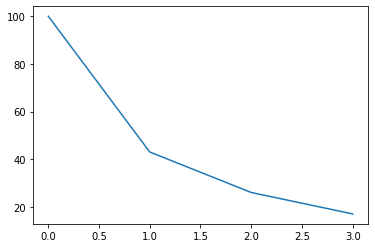

In [34]:
series.plot()

We can also use specific types of visualizations like this:

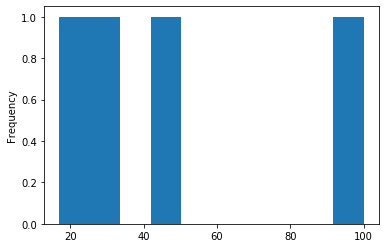

In [35]:
series.plot.hist()

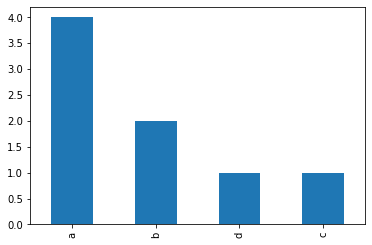

In [36]:
# The .value_counts method returns a series, so we can call .plot on the resulting series
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar()

Any additional keyword arguments passed to pandas plotting methods will be passed along to the corresponding matplotlib functions. In addition, we can use matplotlib the same way we have before to set titles, tweak axis labels, etc.

Text(0.5, 1.0, 'Example Pandas Visualization')

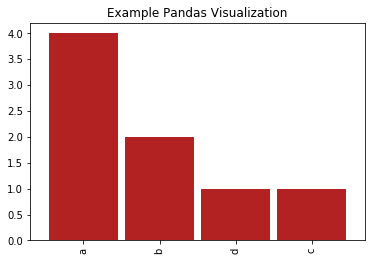

In [37]:
pd.Series(['a', 'b', 'a', 'c', 'b', 'a', 'd', 'a']).value_counts().plot.bar(color='firebrick', width=.9)
plt.title('Example Pandas Visualization')

## Further Reading

- [pandas documentation: `Series`](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#series)

## Exercises

Make a file named `pandas_series.py` or `pandas_series.ipynb` for the following exercises.

1. Use pandas to create a Series from the following data:

        ["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]

    1. Name the variable that holds the series `fruits`.

    2. Run `.describe()` on the series to see what `describe` returns for a series of strings.

    3. Run the code necessary to produce only the unique fruit names.

    4. Determine how many times each value occurs in the series.

    5. Determine the most frequently occurring fruit name from the series.

    6. Determine the least frequently occurring fruit name from the series.

    7. Write the code to get the longest string from the `fruits` series.

    8. Find the fruit(s) with 5 or more letters in the name.

    9. Capitalize all the fruit strings in the series.

    10. Count the letter "a" in all the fruits (use string vectorization)

    11. Output the number of vowels in each and every fruit.

    12. Use the `.apply` method and a lambda function to find the fruit(s) containing two or more `"o"` letters in the name.

    13. Write the code to get only the fruits containing "berry" in the name

    14. Write the code to get only the fruits containing "apple" in the name

    15. Which fruit has the highest amount of vowels?

1. Use pandas to create a Series from the following data:

        ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']
        
    - What is the data type of the series?
    - Use series operations to convert the series to a numeric data type.
    - What is the maximum value? The minimum?
    - Bin the data into 4 equally sized intervals and show how many values fall into each bin.
    - Plot a histogram of the data. Be sure to include a title and axis labels.

1. Use pandas to create a Series from the following exam scores:

        [60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]

    - What is the minimum exam score? The max, mean, median?
    - Plot a histogram of the scores.
    - Convert each of the numbers above into a letter grade. For example, 86
      should be a 'B' and 95 should be an 'A'.
    - Write the code necessary to implement a curve. I.e. that grade closest to
      100 should be converted to a 100, and that many points should be given to
      every other score as well.

1. Use pandas to create a Series from the following string:

        'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'

    - What is the most frequently occuring letter? Least frequently occuring?
    - How many vowels are in the list?
    - How many consonants are in the list?
    - Create a series that has all of the same letters, but uppercased
    - Create a bar plot of the frequencies of the 6 most frequently occuring
      letters.
      
1. Complete the exercises from [https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a](https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a), but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.